# Benchmarking 2D / 3D PORTRAITS + Correlation diagrams + Correlation factors 
--------

In [1]:
# import
from multidimvis_main import *

### TOY NETWORKS

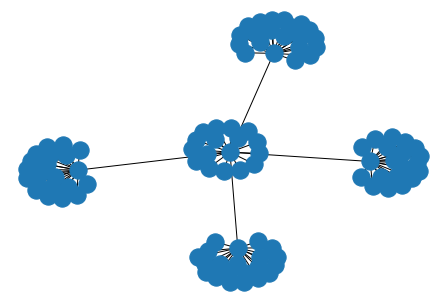

In [1111]:
# TREE GRAPH
organism = 'tree'
n = 100 # number of nodes
r = 20 # branching factor
G = nx.full_rary_tree(r, n)
nx.draw(G)
# STAR GRAPH
#organism = 'star'
#n = 1000
#G = nx.star_graph(n)

# CYCLE GRAPH
#organism = 'cycle'
#n = 1000
#G = nx.cycle_graph(n)

### GEOMETRIES 

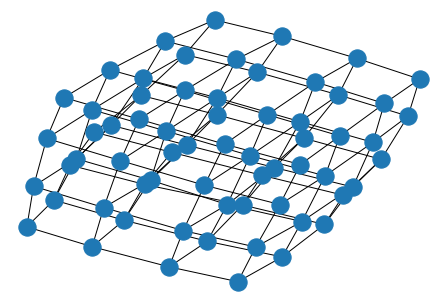

In [1160]:
# 3D grid 
organism = 'grid'

G_grid = nx.grid_graph([4,4,4],periodic=False)
G = G_grid 
nx.draw(G)

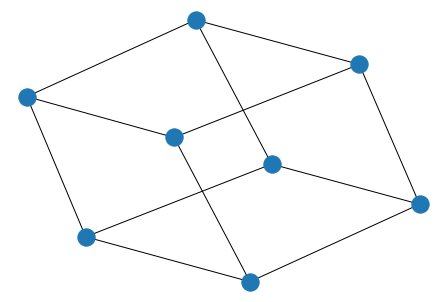

In [62]:
# Torus 
organism = 'torus'

G_tor = nx.grid_2d_graph(48,24,periodic=True) #24,12

G_tor = nx.grid_2d_graph(4,2,periodic=True) 
G = G_tor
nx.draw(G)

## NETWORK

In [63]:
print('Number of nodes i.e. genes: %s' %len(list(G.nodes())))
print('Number of edges: %s' %len(list(G.edges())))
print('Network density: %.1f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

Number of nodes i.e. genes: 8
Number of edges: 12
Network density: 38.1%


+ Feature Collection 

In [64]:
# DEGREE CENTRALITY - Node degree: important nodes being involved within high number of interactions
degs = dict(G.degree())
d_deghubs = {}
for node, de in sorted(degs.items(),key = lambda x: x[1], reverse = 1):
    d_deghubs[node] = round(float(de/max(degs.values())),4)
    
# CLOSENESSCENTRALITY - Measures how closely a node is connected to all other nodes to highlight f.ex. core-periphery structure, or identify central nodes
closeness = nx.closeness_centrality(G)
d_clos = {}
for node, cl in sorted(closeness.items(), key = lambda x: x[1], reverse = 1):
    d_clos[node] = round(cl,4)
    
# BETWEENESS CENTRALITY - How many shortest paths between pairs of other nodes in the network go through one node. High BC indicates "bottleneck nodes" in the network
betweens = nx.betweenness_centrality(G)
d_betw = {}
for node, be in sorted(betweens.items(), key = lambda x: x[1], reverse = 1):
     d_betw[node] = round(be,4)
    
# EIGENVECTOR CENTRALITY - Compute the eigenvector centrality for the graph
eigen = nx.eigenvector_centrality(G)
d_eigen = {}
for node, eig in sorted(eigen.items(), key = lambda x: x[1], reverse = 1):
     d_eigen[node] = round(eig,4)

In [65]:
d_deghubs_sorted = {key:d_deghubs[key] for key in sorted(d_deghubs.keys())}
d_clos_sorted = {key:d_clos[key] for key in sorted(d_clos.keys())}
d_betw_sorted = {key:d_betw[key] for key in sorted(d_betw.keys())}
d_eigen_sorted = {key:d_eigen[key] for key in sorted(d_eigen.keys())}

# feature collection
feature_dict = dict(zip(d_deghubs_sorted.keys(), zip(
                                                     d_deghubs_sorted.values(), 
                                                     d_clos_sorted.values(), 
                                                     d_betw_sorted.values(), 
                                                     d_eigen_sorted.values(),
                                                    )))

# IMPORTANT :
# sort all feature according to Graph node IDs
feature_dict_sorted = {key:feature_dict[key] for key in G.nodes()}
feature_df = pd.DataFrame.from_dict(feature_dict_sorted, orient = 'index', columns = ['degs', 
                                                                                      'clos', 
                                                                                      'betw', 
                                                                                      'eigen',
                                                                                      ]) 

In [66]:
feature_df.head()

,degs,clos,betw,eigen
"(0, 0)",1.0,0.5833,0.119,0.3536
"(0, 1)",1.0,0.5833,0.119,0.3536
"(1, 0)",1.0,0.5833,0.119,0.3536
"(1, 1)",1.0,0.5833,0.119,0.3536
"(2, 0)",1.0,0.5833,0.119,0.3536


+ Matrices

In [67]:
# Adjacency
A = nx.adjacency_matrix(G)
adj = A.toarray()
DM_adj = pd.DataFrame(adj, columns = list(G.nodes()), index=list(G.nodes()))

In [68]:
DM_adj.head() 

,"(0, 0)","(0, 1)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(3, 0)","(3, 1)"
"(0, 0)",0,1,1,0,0,0,1,0
"(0, 1)",1,0,0,1,0,0,0,1
"(1, 0)",1,0,0,1,1,0,0,0
"(1, 1)",0,1,1,0,0,1,0,0
"(2, 0)",0,0,1,0,0,1,1,0


In [135]:
r = .8 # restart probability; originally 0.8
alpha = 1.0 
# alpha = 0.5 # --> better results for torus 

DM_m = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))

DM_m_df = pd.DataFrame(DM_m)
#print(DM_m_df.sum(axis=0))

DM_m_transposed = DM_m_df.T

metric = "cosine" 
DM_m_new = pd.DataFrame(distance.squareform(distance.pdist(DM_m_transposed, metric)))
DM_m_new.index = list(G.nodes())
DM_m_new.columns = list(G.nodes())

In [137]:
DM_m = DM_m_new
DM_m.head()

,"(0, 0)","(0, 1)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(3, 0)","(3, 1)"
"(0, 0)",0.000000,0.863616,0.863616,0.972404,0.972404,0.992696,0.863616,0.972404
"(0, 1)",0.863616,0.000000,0.972404,0.863616,0.992696,0.972404,0.972404,0.863616
"(1, 0)",0.863616,0.972404,0.000000,0.863616,0.863616,0.972404,0.972404,0.992696
"(1, 1)",0.972404,0.863616,0.863616,0.000000,0.972404,0.863616,0.992696,0.972404
"(2, 0)",0.972404,0.992696,0.863616,0.972404,0.000000,0.863616,0.863616,0.972404


In [139]:
metric = "cosine" 
DM_cent = pd.DataFrame(distance.squareform(distance.pdist(feature_df, metric)))
DM_cent.index = list(G.nodes())
DM_cent.columns = list(G.nodes())

In [140]:
DM_cent.head()

,"(0, 0)","(0, 1)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(3, 0)","(3, 1)"
"(0, 0)",0.000000e+00,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16
"(0, 1)",1.110223e-16,0.000000e+00,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16
"(1, 0)",1.110223e-16,1.110223e-16,0.000000e+00,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16
"(1, 1)",1.110223e-16,1.110223e-16,1.110223e-16,0.000000e+00,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16
"(2, 0)",1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,0.000000e+00,1.110223e-16,1.110223e-16,1.110223e-16


In [73]:
feature = 'adj'
DM = DM_adj

#feature = 'rwr'
#DM = DM_m

#feature = 'cent'
#DM = DM_cent

____________
# 3 | SET VISUAL PRE-SETTINGS
____________

### GENERAL NODE + EDGE PARAMETERS

In [74]:
# Node, Edge colors

edge_width = 2
edge_col = 'lightgrey'
edge_colordark = 'dimgrey'
opacity_edges = 1

opacity_nodes = 1.0
node_edge_col = None


# Node sizes 

scalef= 0.2
size = list(draw_node_degree(G, scalef).values())

scalef= 0.05
size3d = list(draw_node_degree_3D(G, scalef).values())

### SPECIFIC NODE + EDGE PARAMETERS

In [75]:
color_method = 'clos'
d_to_be_col = d_clos # dict sorted by dict.values (that way the biggest value matches darkest colour of palette)
colours = color_nodes_from_dict(G, d_to_be_col, color_method)

# 2D PORTRAITS

### SPRING

In [76]:
%%time 

# ---------------------------------------
# Spring
# ---------------------------------------
forceatlas2 = ForceAtlas2()
#posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=200)
posG_spring2D = nx.spring_layout(G, dim = 2)
posG_spring3D = nx.spring_layout(G, dim = 3)

CPU times: user 13.3 ms, sys: 1.71 ms, total: 15 ms
Wall time: 14.2 ms


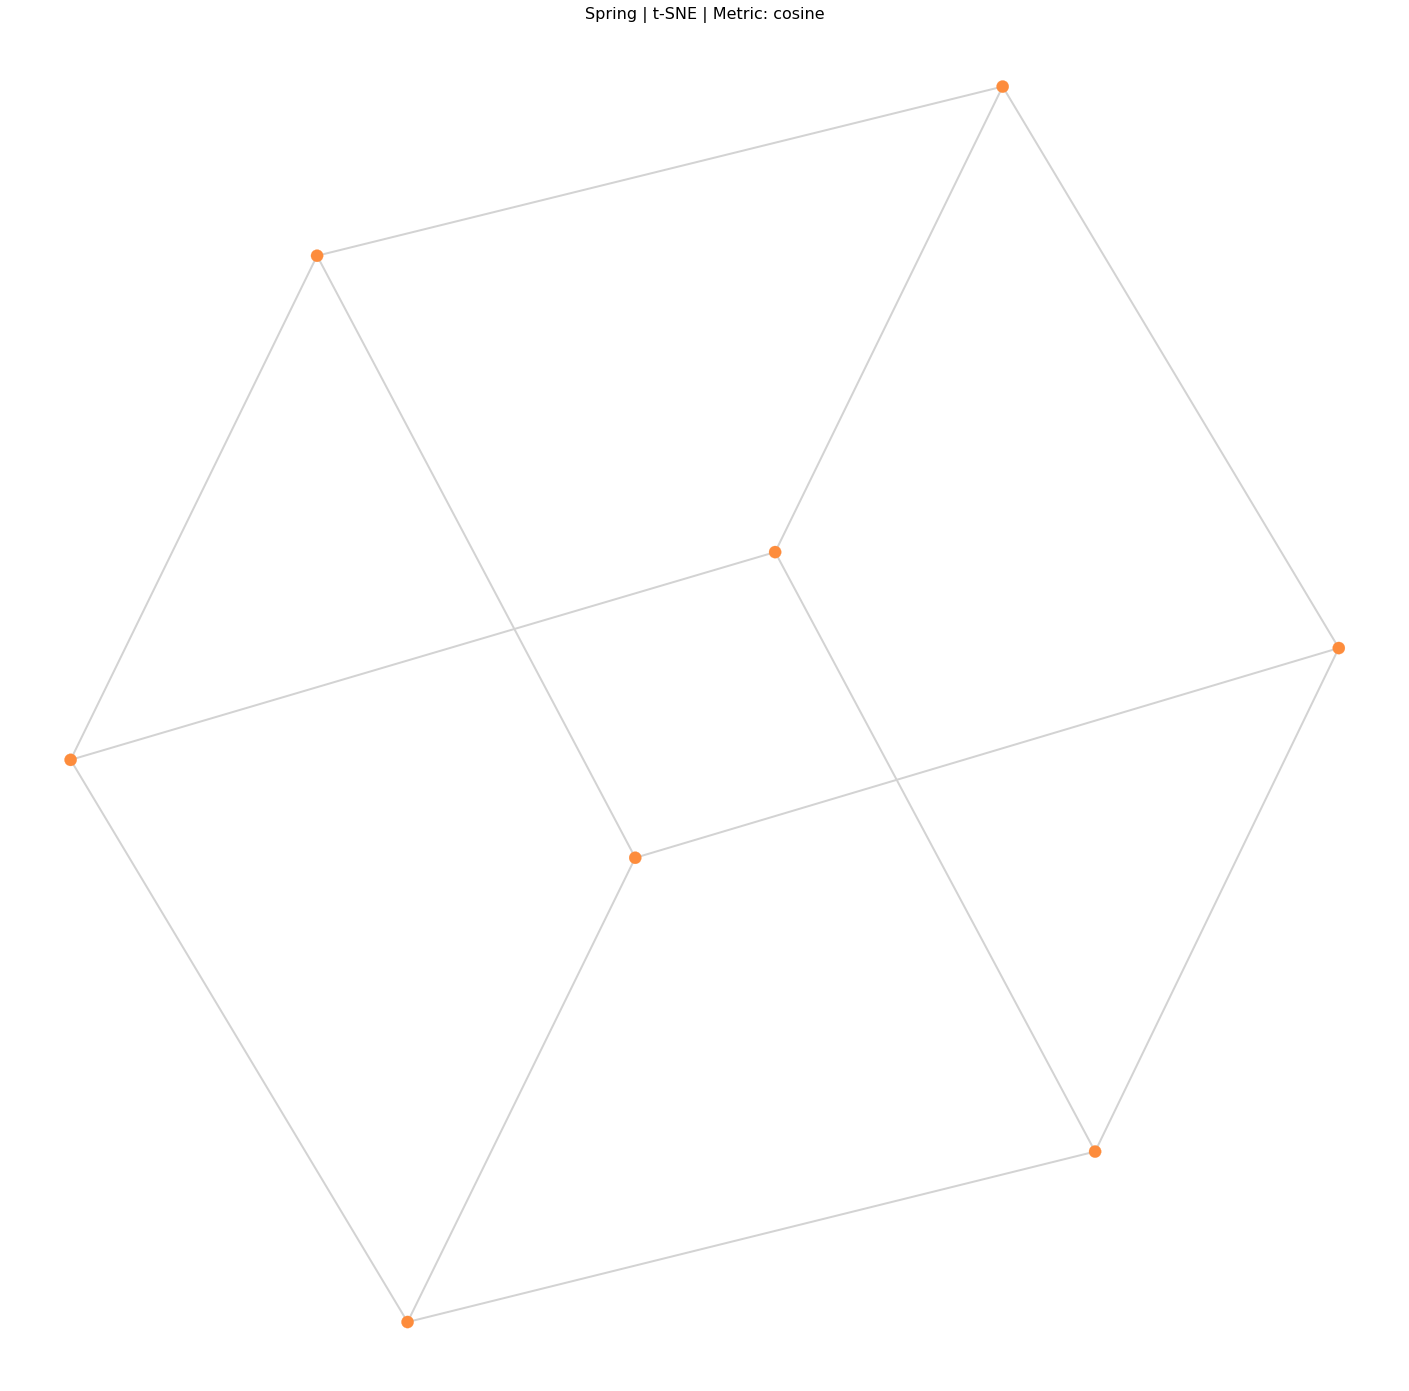

In [77]:
plt.figure(figsize=(25,25))
plt.title('Spring | t-SNE | Metric: '+metric, size= 16)

nx.draw_networkx_nodes(G, posG_spring2D, edgecolors = node_edge_col, linewidths = 0.25, node_color = colours, 
                       node_size= 150, #size, 
                       alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG_spring2D, width = edge_width, edge_color = edge_col, alpha = opacity_edges)

plt.box(False)

plt.savefig('output_plots/2Dspring.png')

plt.show()

### UMAP 

In [78]:
n_neighbors = 10 # balance between local and global structure in the data
spread = 1.0
min_dist = 0.01 # defines how dense points are stacked together 
metric ='cosine'

In [79]:
%%time 
umap = embed_umap_2D(DM, n_neighbors, spread, min_dist, metric)

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1678: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



CPU times: user 1.86 s, sys: 184 ms, total: 2.05 s
Wall time: 1.74 s


In [80]:
posG_umap = get_posG_2D(G.nodes(), umap)
posG_complete_umap = {key:posG_umap[key] for key in G.nodes()}

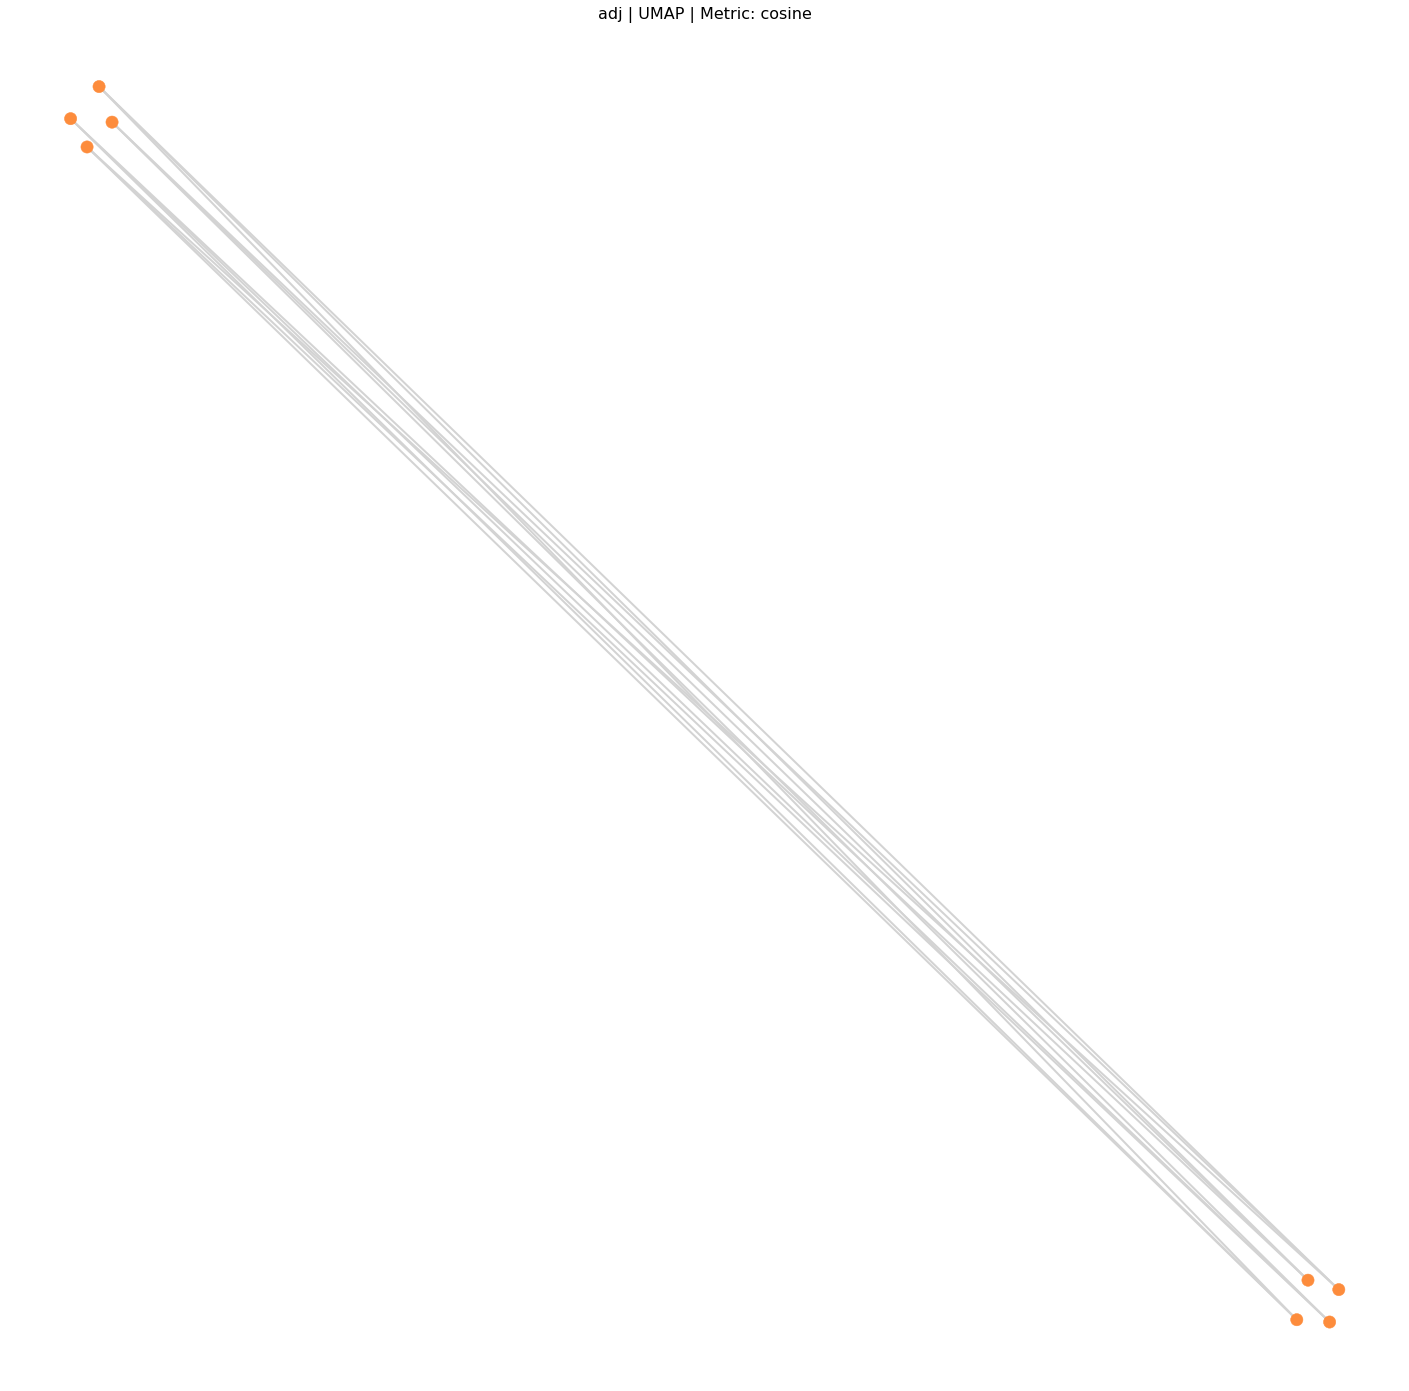

In [81]:
plt.figure(figsize=(25,25))
plt.title(feature+' | UMAP | Metric: '+metric, size=16)

nx.draw_networkx_nodes(G, posG_complete_umap, edgecolors = node_edge_col, linewidths = 0.5, node_color=colours, 
                       node_size = 150, #size, 
                       alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG_complete_umap, width = edge_width, edge_color = edge_col, alpha = opacity_edges)
plt.box(False)

plt.savefig('output_plots/2Dtoynetworkumap_'+feature+'_'+metric+'_'+color_method+'_'+str(n_neighbors)+'_'+str(spread)+'_'+str(min_dist)+'_'+organism+'.png')

plt.show()

# 3D SPRING

In [82]:
spring_nodes = get_trace_nodes_3D(posG_spring3D, None, colours, 4) #size3d)
spring_edges = get_trace_edges_3D(G, posG_spring3D, edge_colordark, opac=1)

spring_data = [spring_nodes, spring_edges]

In [83]:
print('Spring Layout:', organism)

fig = pgo.Figure()
for i in spring_data:
    fig.add_trace(i)
'''fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                    dragmode="turntable",
                    #annotations=annotations,
                ))'''

fig.update_layout(template='plotly_white', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='white')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='white')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='white')),    
                    dragmode="turntable",
                    #annotations=annotations,
                ))    
#py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dtoynetwork_'+'spring_'+organism+'.html', auto_open=True)

Spring Layout: torus


'output_plots/3Dtoynetwork_spring_torus.html'

# 3D PORTRAITS

### UMAP 

In [84]:
n_neighbors = 30# balance between local and global structure in the data
spread = 1.0
min_dist = 0.01 # defines how dense points are stacked together 
metric='cosine'

In [85]:
%%time 
umap_3D = embed_umap_3D(DM, n_neighbors, spread, min_dist, metric)

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1678: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



CPU times: user 2.13 s, sys: 175 ms, total: 2.31 s
Wall time: 2.01 s


In [86]:
posG_3Dumap = get_posG_3D(list(G.nodes()), umap_3D)
posG_3D_complete_umap = {key:posG_3Dumap[key] for key in G.nodes()}

In [87]:
%%time 
umap_nodes = get_trace_nodes_3D(posG_3D_complete_umap, None, colours, 4) # size3d)
umap_edges = get_trace_edges_3D(G, posG_3D_complete_umap, edge_colordark, 1.0) 

umap_data = [umap_edges, umap_nodes]
#umap_data = [umap_nodes]

CPU times: user 2.37 ms, sys: 121 µs, total: 2.49 ms
Wall time: 2.51 ms


In [88]:
fig = pgo.Figure()
for i in umap_data:
    fig.add_trace(i)

'''fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='black')),    
                    dragmode="turntable",
                    #annotations=annotations,
                ))    '''

fig.update_layout(template='plotly_white', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='white')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='white')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='white')),    
                    dragmode="turntable",
                    #annotations=annotations,
                ))    
#py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dtoynetwork_umap_'+feature+'_'+organism+'.html', auto_open=True)

'output_plots/3Dtoynetwork_umap_adj_torus.html'

_________

# EVALUATION OF Layouts compared to Spring
### CALCULATE DISTANCES OF NODES IN LAYOUTS
+ Plots to test "Original Distances" with embedded Distances 
+ X-axis = distances of layout, Y-axis = actual Distance Matrix Distances

## 2D layouts Correlation diagrams 

In [284]:
# get all possible combinations of points
# keys of the dictionary are : (p1,p2),(p2,p3),... 
# values are distances from p1 to p2

from itertools import combinations
dist_spring2D = dict()
for (id1,p1),(id2,p2) in combinations(posG_spring2D.items(),2):
    dx,dy = p1[0]-p2[0], p1[1]-p2[1]
    dist_spring2D[id1,id2] = math.sqrt(dx*dx+dy*dy)
    

from itertools import combinations
dist_layout2D = dict()
for (id1,p1),(id2,p2) in combinations(posG_complete_umap.items(),2):
    dx,dy = p1[0]-p2[0], p1[1]-p2[1]
    dist_layout2D[id1,id2] = math.sqrt(dx*dx+dy*dy)

In [403]:
# get squareform dataframes from distances (spring, layout)

dist_spring_list = [dist[1] for dist in sorted(dist_spring2D.items())]
df_spring2D = pd.DataFrame(dist.squareform(dist_spring_list), index=DM.index, columns=DM.columns)

dist_layout_list = [dist[1] for dist in sorted(dist_layout2D.items())]
df_layout2D = pd.DataFrame(dist.squareform(dist_layout_list), index=DM.index, columns=DM.columns)



# get traces for plotting

spring_trace = []
for i in range(len(df_spring2D)):
    spring_trace.append(get_trace_xy(df_spring2D.values[i],DM.values[i], 'Spring', 'dimgrey'))
    
layout_trace = []
for i in range(len(df_layout2D)):
    layout_trace.append(get_trace_xy(df_layout2D.values[i], DM.values[i], feature, "red"))
    

# REGRESSION LINES 
# regression line SPRING

X_spring2D = df_spring2D.values[0]
Y_spring2D = DM.values[0]
df_spring2D_regr = pd.DataFrame({'X': X_spring2D, 'Y':Y_spring2D})

reg = LinearRegression().fit(np.vstack(df_spring['X']), Y_spring2D)
df_spring2D_regr['bestfit'] = reg.predict(np.vstack(df_spring2D_regr['X']))

# regression line LAYOUT

X_layout2D = df_layout2D.values[0]
Y_layout2D = DM.values[0]
df_layout2D_regr = pd.DataFrame({'X': X_layout2D, 'Y':Y_layout2D})

reg = LinearRegression().fit(np.vstack(df_layout2D_regr['X']), Y_layout2D)
df_layout2D_regr['bestfit'] = reg.predict(np.vstack(df_layout2D_regr['X']))

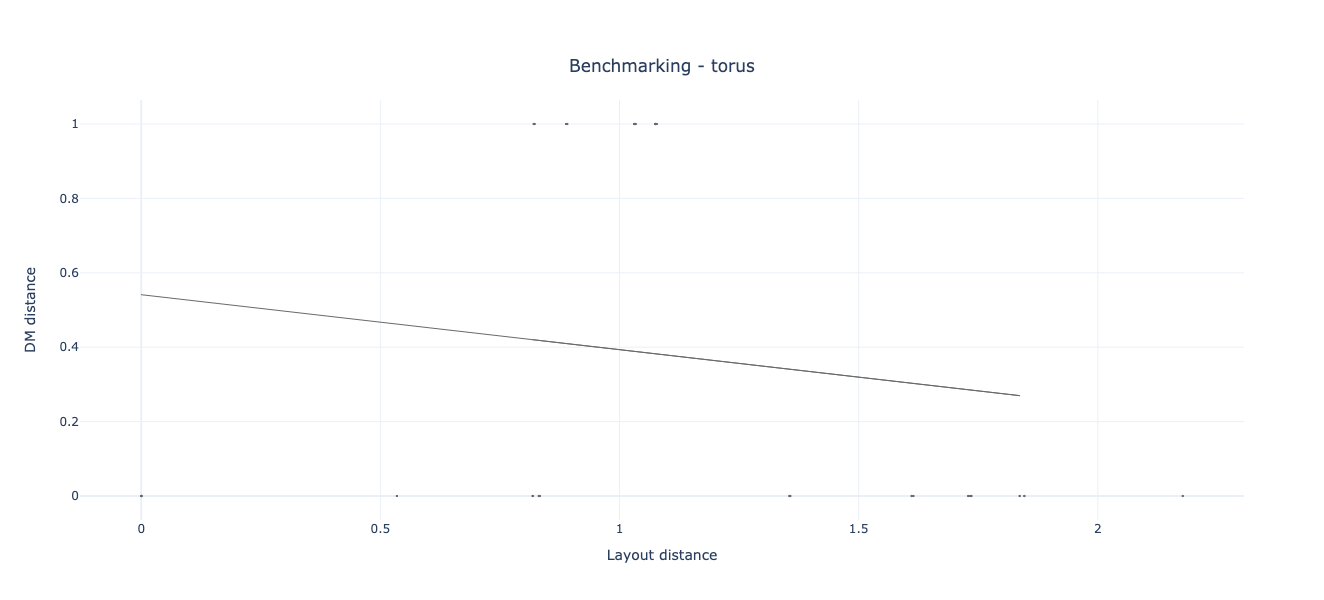

'output_plots/2Dtoynetwork_CorrDiagramSPRING_adj_torus.html'

In [404]:
fig = pgo.Figure()

for i in spring_trace:
    fig.add_trace(i)

# regression line SPRING
fig.add_trace(pgo.Scatter(name='line of best fit - layout', x=X_spring, y=df_spring['bestfit'], 
                          mode='lines',
                          line=dict(
                             color='dimgrey',
                             width=1.0
            ),))

fig.update_layout(title={
                'text': "Benchmarking - "+organism,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
                  template='plotly_white', showlegend=False, width=600, height = 600,
                  xaxis_title = "Layout distance",
                  yaxis_title = "DM distance"
                )    

py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/2Dtoynetwork_CorrDiagramSPRING_'+feature+'_'+organism+'.html', auto_open=False)

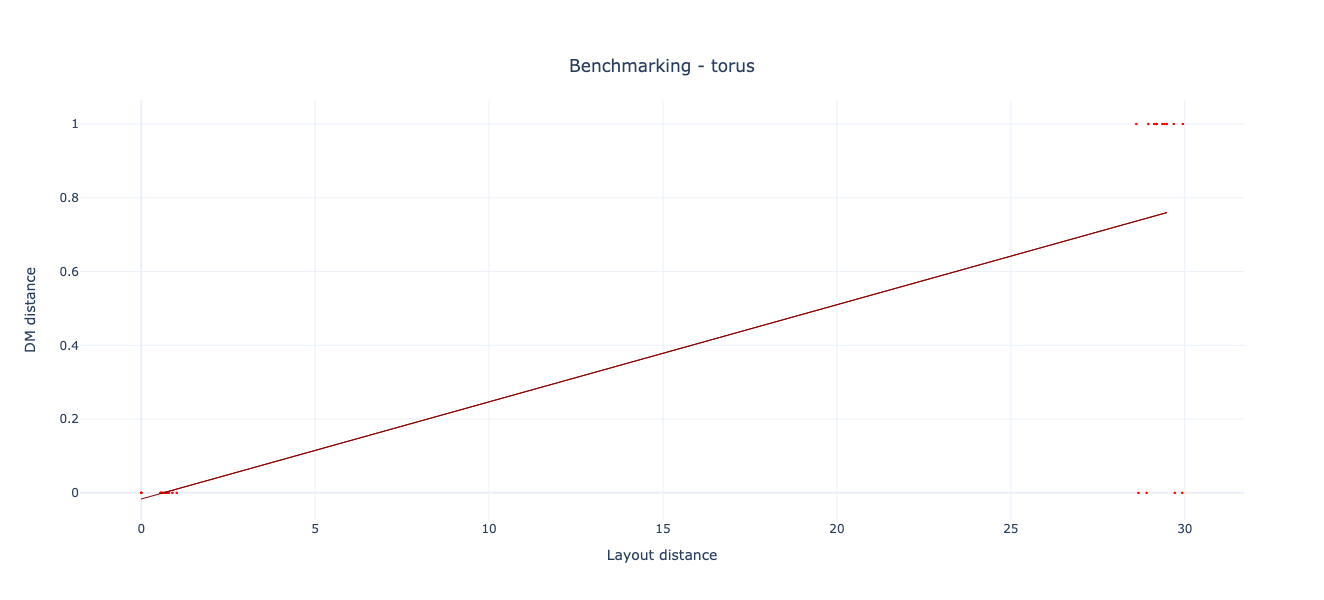

'output_plots/2Dtoynetwork_CorrDiagramLAYOUT_adj_torus.html'

In [405]:
fig = pgo.Figure()

for i in layout_trace:
    fig.add_trace(i)


# regression line LAYOUT
fig.add_trace(pgo.Scatter(name='line of best fit - layout', x=X_layout, y=df_layout['bestfit'], 
                          mode='lines',
                          line=dict(
                             color='darkred',
                             width=1.0
            ),))
    
    
fig.update_layout(
            title={
                'text': "Benchmarking - "+organism,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
                  template='plotly_white', showlegend=False, width=600, height = 600,
                  xaxis_title = "Layout distance",
                  yaxis_title = "DM distance"
                )    

py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/2Dtoynetwork_CorrDiagramLAYOUT_'+feature+'_'+organism+'.html', auto_open=False)

## 3D layouts Correlation diagrams

In [380]:
# get all possible combinations of points
# keys of the dictionary are : (p1,p2),(p2,p3),... 
# values are distances from p1 to p2

from itertools import combinations
dist_spring3D = dict()
for (id1,p1),(id2,p2) in combinations(posG_spring3D.items(),2):
    dx,dy,dz = p1[0]-p2[0], p1[1]-p2[1], p1[2]-p2[2]
    dist_spring3D[id1,id2] = math.sqrt(dx*dx+dy*dy+dz*dz)
    

from itertools import combinations
dist_layout3D = dict()
for (id1,p1),(id2,p2) in combinations(posG_3D_complete_umap.items(),2):
    dx,dy,dz = p1[0]-p2[0], p1[1]-p2[1], p1[2]-p2[2]
    dist_layout3D[id1,id2] = math.sqrt(dx*dx+dy*dy+dz*dz)

In [406]:
# get squareform dataframes from distances (spring, layout)

dist_spring3D_list = [dist[1] for dist in sorted(dist_spring3D.items())]
df_spring3D = pd.DataFrame(dist.squareform(dist_spring3D_list), index=DM.index, columns=DM.columns)

dist_layout3D_list = [dist[1] for dist in sorted(dist_layout3D.items())]
df_layout3D = pd.DataFrame(dist.squareform(dist_layout3D_list), index=DM.index, columns=DM.columns)


# get traces for plotting

spring3D_trace = []
for i in range(len(df_spring3D)):
    spring3D_trace.append(get_trace_xy(df_spring3D.values[i],DM.values[i], 'Spring', 'dimgrey'))
    
layout3D_trace = []
for i in range(len(df_layout2D)):
    layout3D_trace.append(get_trace_xy(df_layout3D.values[i], DM.values[i], feature, "red"))
    
    
# REGRESSION LINES 
# regression line SPRING

X_spring3D = df_spring3D.values[0]
Y_spring3D = DM.values[0]
df_spring3D_regr = pd.DataFrame({'X': X_spring3D, 'Y':Y_spring3D})

reg = LinearRegression().fit(np.vstack(df_spring3D_regr['X']), Y_spring3D)
df_spring3D_regr['bestfit'] = reg.predict(np.vstack(df_spring3D_regr['X']))

# regression line LAYOUT

X_layout3D= df_layout3D.values[0]
Y_layout3D = DM.values[0]
df_layout3D_regr = pd.DataFrame({'X': X_layout3D, 'Y':Y_layout3D})

reg = LinearRegression().fit(np.vstack(df_layout3D_regr['X']), Y_layout3D)
df_layout3D_regr['bestfit'] = reg.predict(np.vstack(df_layout3D_regr['X']))

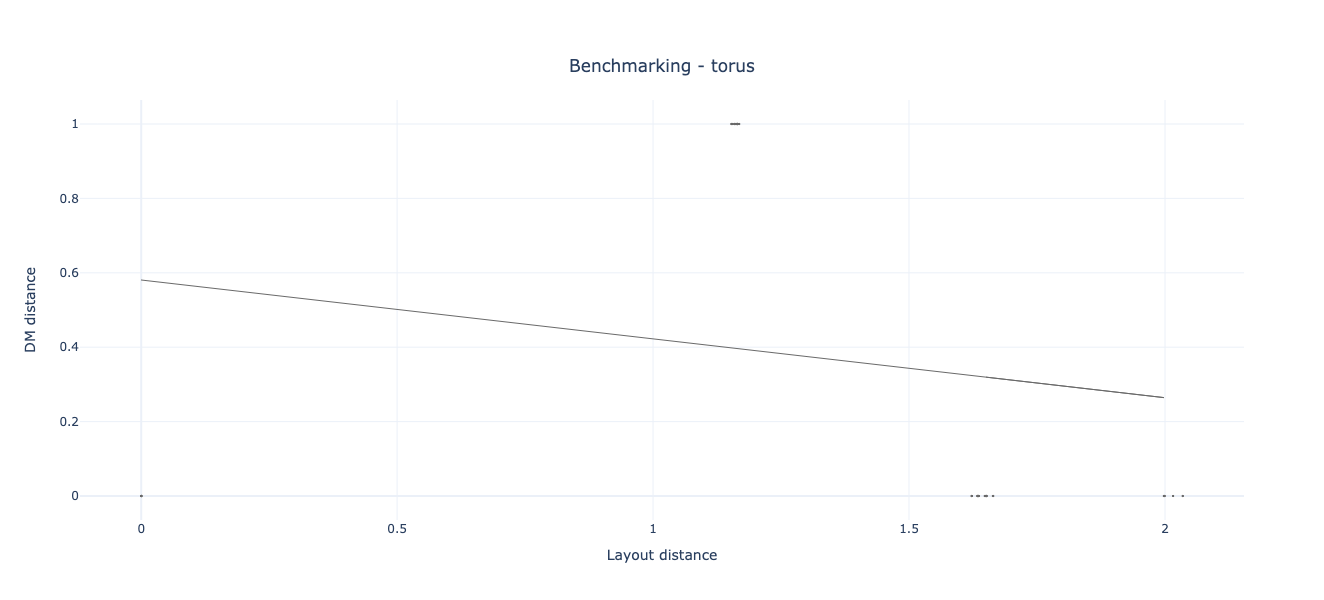

'output_plots/3Dtoynetwork_CorrDiagramSPRING_adj_torus.html'

In [408]:
fig = pgo.Figure()

for i in spring3D_trace:
    fig.add_trace(i)

# regression line SPRING
fig.add_trace(pgo.Scatter(name='line of best fit - layout', x=X_spring3D, y=df_spring3D_regr['bestfit'], 
                          mode='lines',
                          line=dict(
                             color='dimgrey',
                             width=1.0
            ),))

fig.update_layout(title={
                'text': "Benchmarking - "+organism,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
                  template='plotly_white', showlegend=False, width=600, height = 600,
                  xaxis_title = "Layout distance",
                  yaxis_title = "DM distance"
                )    

py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dtoynetwork_CorrDiagramSPRING_'+feature+'_'+organism+'.html', auto_open=False)

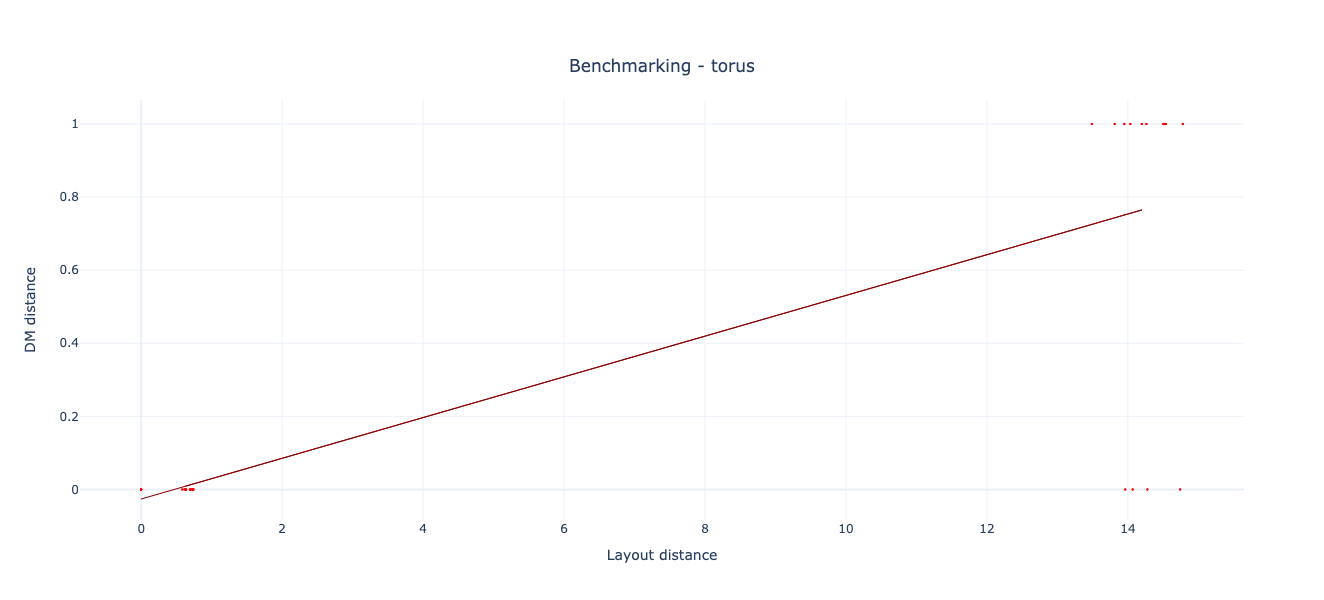

'output_plots/3Dtoynetwork_CorrDiagramLAYOUT_adj_torus.html'

In [409]:
fig = pgo.Figure()

for i in layout3D_trace:
    fig.add_trace(i)


# regression line LAYOUT
fig.add_trace(pgo.Scatter(name='line of best fit - layout', x=X_layout3D, y=df_layout3D_regr['bestfit'], 
                          mode='lines',
                          line=dict(
                             color='darkred',
                             width=1.0
            ),))
    
    
fig.update_layout(
            title={
                'text': "Benchmarking - "+organism,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
                  template='plotly_white', showlegend=False, width=600, height = 600,
                  xaxis_title = "Layout distance",
                  yaxis_title = "DM distance"
                )    

py.iplot(fig)

plotly.offline.plot(fig, filename = 'output_plots/3Dtoynetwork_CorrDiagramLAYOUT_'+feature+'_'+organism+'.html', auto_open=False)

# Statistical Test for correlation between data sets (DMs to Layouts): 
### Pearson Correlation
+ Pearson product-moment correlation coefficients
+ The relationship between the correlation coefficient matrix, R, and the covariance matrix, C
+ Value can range from -1 to 1, the closer to 1 the more positive linear correlation ( the closer to -1 the more negative linear correlation)

In [411]:
# Pearson Correlation coefficient comparison of Spring- to Layouts-coordinates

print('Number of Nodes: ', len(G.nodes()))
print('Organism: ', organism)

print('-----------------')

print('2D')
pearson_spring = np.corrcoef(df_spring2D, DM)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring),10))

pearson_layout = np.corrcoef(df_layout2D, DM)
print('Layout: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_layout),10))

print('-----------------')

print('3D')
pearson_spring = np.corrcoef(df_spring3D, DM)
print('Spring: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_spring),10))

pearson_layout = np.corrcoef(df_layout3D, DM)
print('Layout: Mean of Pearson Correlation Coefficient: ',round(np.mean(pearson_layout),10))

Number of Nodes:  8
Organism:  torus
-----------------
2D
Spring: Mean of Pearson Correlation Coefficient:  0.0295302975
Layout: Mean of Pearson Correlation Coefficient:  2.3934e-05
-----------------
3D
Spring: Mean of Pearson Correlation Coefficient:  1.66111e-05
Layout: Mean of Pearson Correlation Coefficient:  7.80016e-05


### Spearman Correlation 
+ to summarize the strength of the linear relationship between two data samples (Rank correlation)
+ Compared to Pearson: assumes a non-gaussian distribution and less sensitive to outliers that are in the tail of both samples - because of limiting the outliers to the value of their ranks 
+ Value can range from -1 to 1, the closer to 1 the more monotonic relationship between X and Y

In [412]:
# Spearman Correlation coefficient comparison of Spring- to Layouts-coordinates

from scipy.stats import spearmanr

print('Number of Nodes: ', len(G.nodes()))
print('Organism: ', organism)

print('-----------------')

print('2D')
spearman_spring, _ = spearmanr(df_spring2D, DM)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring),9))

spearman_layout, _ = spearmanr(df_layout2D, DM)
print('Layout: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_layout),9))

print('-----------------')

print('3D')
spearman_spring, _ = spearmanr(df_spring3D, DM)
print('Spring: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_spring),9))

spearman_layout, _ = spearmanr(df_layout3D, DM)
print('Layout: Mean of Spearman Correlation Coefficient: ',round(np.mean(spearman_layout),9))

Number of Nodes:  8
Organism:  torus
-----------------
2D
Spring: Mean of Spearman Correlation Coefficient:  0.038690476
Layout: Mean of Spearman Correlation Coefficient:  0.013206845
-----------------
3D
Spring: Mean of Spearman Correlation Coefficient:  0.000744048
Layout: Mean of Spearman Correlation Coefficient:  0.010230655
